Rows in train_df: 1522065
Rows in test_df: 51739
Rows in vessels_df: 711
Rows in schedules_df: 136250
All vesselIds in test are present in train.
All vesselIds in train are present in vessels.
Encountered vesselIds in train that were not in schedules. Count: 449


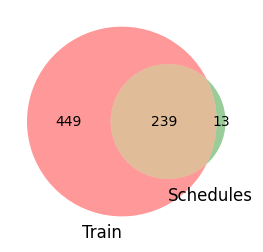

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

train_df = pd.read_csv('../data/original_data/ais_train.csv', sep='|')
test_df = pd.read_csv('../data/original_data/ais_test.csv')
vessels_df = pd.read_csv('../data/original_data/vessels.csv', sep='|')
schedules_df = pd.read_csv('../data/original_data/schedules_to_may_2024.csv', sep='|')


print(f"Rows in train_df: {len(train_df)}")
print(f"Rows in test_df: {len(test_df)}")
print(f"Rows in vessels_df: {len(vessels_df)}")
print(f"Rows in schedules_df: {len(schedules_df)}")



vessel_ids_train = set(train_df['vesselId'].unique())
vessel_ids_test = set(test_df['vesselId'].unique())
vessel_ids_vessels = set(vessels_df['vesselId'].unique())
vessel_ids_schedules = set(schedules_df['vesselId'].unique())



missing_vessel_ids = vessel_ids_test - vessel_ids_train
if missing_vessel_ids:
    print(f"Encountered vesselIds in test that were not in train: {missing_vessel_ids}")
else:
    print("All vesselIds in test are present in train.")

missing_vessel_ids = vessel_ids_train - vessel_ids_vessels
if missing_vessel_ids:
    print(f"Encountered vesselIds in train in test that were not in vessels: {missing_vessel_ids}")
else:
    print("All vesselIds in train are present in vessels.")
    
missing_vessel_ids = vessel_ids_train - vessel_ids_schedules
if missing_vessel_ids:
    print(f"Encountered vesselIds in train that were not in schedules. Count: {len(missing_vessel_ids)}")
else:
    print("All vesselIds in train are present in schedules.")

plt.figure(figsize=(3, 3))
venn = venn2([vessel_ids_train, vessel_ids_schedules],
             set_labels=('Train', 'Schedules'))

plt.show()

In [2]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Label encoding
label_encoder = LabelEncoder()

# Fit label encoder on the combined data from both train and test to ensure consistency
combined_vessel_ids = pd.concat([train_df['vesselId'], test_df['vesselId'], vessels_df['vesselId'], schedules_df['vesselId']])
label_encoder.fit(combined_vessel_ids)

train_df['vesselId'] = label_encoder.transform(train_df['vesselId'])
test_df['vesselId'] = label_encoder.transform(test_df['vesselId'])
vessels_df['vesselId'] = label_encoder.transform(vessels_df['vesselId'])
schedules_df['vesselId'] = label_encoder.transform(schedules_df['vesselId'])


# Step 2: Combine train and test for scaling to ensure consistent scaling
combined_df = pd.concat([train_df[['vesselId']], test_df[['vesselId']], vessels_df[['vesselId']], schedules_df[['vesselId']]])

# Step 3: Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
combined_scaled = scaler.fit_transform(combined_df)

# Step 4: Split the scaled data back to train and test
train_df['vesselId'] = combined_scaled[:len(train_df)]
test_df['vesselId'] = combined_scaled[len(train_df):len(train_df) + len(test_df)]
vessels_df['vesselId'] = combined_scaled[len(train_df) + len(test_df):len(train_df) + len(test_df) + len(vessels_df)]
schedules_df['vesselId'] = combined_scaled[len(train_df) + len(test_df) + len(vessels_df):]



print(f"Rows in train_df: {len(train_df)}")
print(f"Rows in test_df: {len(test_df)}")
print(f"Rows in vessels_df: {len(vessels_df)}")
print(f"Rows in schedules_df: {len(schedules_df)}")

vessel_ids_train = set(train_df['vesselId'].unique())
vessel_ids_test = set(test_df['vesselId'].unique())
vessel_ids_vessels = set(vessels_df['vesselId'].unique())
vessel_ids_schedules = set(schedules_df['vesselId'].unique())

missing_vessel_ids = vessel_ids_test - vessel_ids_train
if missing_vessel_ids:
    print(f"Encountered vesselIds in test that were not in train: {missing_vessel_ids}")
else:
    print("All vesselIds in test are present in train.")

missing_vessel_ids = vessel_ids_train - vessel_ids_vessels
if missing_vessel_ids:
    print(f"Encountered vesselIds in train in test that were not in vessels: {missing_vessel_ids}")
else:
    print("All vesselIds in train are present in vessels.")
    
missing_vessel_ids = vessel_ids_train - vessel_ids_schedules
if missing_vessel_ids:
    print(f"Encountered vesselIds in train in test that were not in schedules. Count: {len(missing_vessel_ids)}")
else:
    print("All vesselIds in train are present in schedules.")



Rows in train_df: 1522065
Rows in test_df: 51739
Rows in vessels_df: 711
Rows in schedules_df: 136250
All vesselIds in test are present in train.
All vesselIds in train are present in vessels.
Encountered vesselIds in train in test that were not in schedules. Count: 449


In [3]:
test_df.head()

,ID,vesselId,time,scaling_factor
0,0,0.123611,2024-05-08 00:03:16,0.3
1,1,0.909722,2024-05-08 00:06:17,0.3
2,2,0.869444,2024-05-08 00:10:02,0.3
3,3,0.790278,2024-05-08 00:10:34,0.3
4,4,0.001389,2024-05-08 00:12:27,0.3


In [4]:
train_df.to_csv('../data/processed_data/train.csv', index=False)
test_df.to_csv('../data/processed_data/test.csv', index=False)
vessels_df.to_csv('../data/processed_data/vessels.csv', index=False)
schedules_df.to_csv('../data/processed_data/schedules.csv', index=False)
